# Time Series Basics

In [138]:
# Initial imports
import pandas as pd
import os
import datetime
import panel as pn
import requests
import alpaca_trade_api as tradeapi
from pathlib import Path
from datetime import datetime,date
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import ccxt
import math
import pandas_datareader as web
plt.style.use('fivethirtyeight')

%matplotlib inline
from dotenv import load_dotenv

## Import Cryptos Data Using KRAKEN API KEY

In [139]:
# Load environment variables
load_dotenv()

# Import environment variables
Kraken_Public_Key = os.getenv("KRAKEN_API_KEY")
Kraken_Secret_Key = os.getenv("KRAKEN_SECRET_KEY")

# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': Kraken_Public_Key,
    'secret': Kraken_Secret_Key,
})

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(Kraken_Public_Key)}")
print(f"Kraken secren data type: {type(Kraken_Secret_Key)}")

# Connect to Kraken and load the available cryptocurrencies
Crypto_Details = exchange.load_markets()

# Import data as a Pandas DataFrame
Crypto_df = pd.DataFrame(Crypto_Details)

# Display sample data
Crypto_df

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/AUD,YFI/ETH,YFI/EUR,YFI/GBP,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,USD/CAD,USD/JPY
percentage,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
tierBased,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
taker,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,...,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.002,0.002,0.002,0.002
maker,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,...,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.002,0.002,0.002,0.002
tiers,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...",...,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000..."
precision,"{'amount': 8, 'price': 2}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 7}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 5}",...,"{'amount': 8, 'price': 0}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 0}","{'amount': 8, 'price': 0}","{'amount': 8, 'price': 0}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}"
limits,"{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...",...,"{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ..."
id,AAVEAUD,AAVEETH,AAVEEUR,AAVEGBP,AAVEUSD,AAVEXBT,ADAAUD,ADAETH,ADAEUR,ADAGBP,...,YFIAUD,YFIETH,YFIEUR,YFIGBP,YFIUSD,YFIXBT,ZEURZUSD,ZGBPZUSD,ZUSDZCAD,ZUSDZJPY
symbol,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/AUD,YFI/ETH,YFI/EUR,YFI/GBP,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,USD/CAD,USD/JPY
base,AAVE,AAVE,AAVE,AAVE,AAVE,AAVE,ADA,ADA,ADA,ADA,...,YFI,YFI,YFI,YFI,YFI,YFI,EUR,GBP,USD,USD


In [140]:
# Print column values of DataFrame
print(type(Crypto_df.columns.values))
print(Crypto_df.columns.values)
print(len(Crypto_df.columns.values))
# Show list of available functions for the current exchange (in this case Kraken)
exchange.has

<class 'numpy.ndarray'>
['AAVE/AUD' 'AAVE/ETH' 'AAVE/EUR' 'AAVE/GBP' 'AAVE/USD' 'AAVE/BTC'
 'ADA/AUD' 'ADA/ETH' 'ADA/EUR' 'ADA/GBP' 'ADA/USD' 'ADA/USDT' 'ADA/BTC'
 'ALGO/ETH' 'ALGO/EUR' 'ALGO/GBP' 'ALGO/USD' 'ALGO/BTC' 'ANT/ETH'
 'ANT/EUR' 'ANT/USD' 'ANT/BTC' 'ATOM/AUD' 'ATOM/ETH' 'ATOM/EUR' 'ATOM/GBP'
 'ATOM/USD' 'ATOM/BTC' 'AUD/JPY' 'AUD/USD' 'BAL/ETH' 'BAL/EUR' 'BAL/USD'
 'BAL/BTC' 'BAT/ETH' 'BAT/EUR' 'BAT/USD' 'BAT/BTC' 'BCH/AUD' 'BCH/ETH'
 'BCH/EUR' 'BCH/GBP' 'BCH/JPY' 'BCH/USD' 'BCH/USDT' 'BCH/BTC' 'COMP/ETH'
 'COMP/EUR' 'COMP/USD' 'COMP/BTC' 'CRV/ETH' 'CRV/EUR' 'CRV/USD' 'CRV/BTC'
 'DAI/EUR' 'DAI/USD' 'DAI/USDT' 'DASH/EUR' 'DASH/USD' 'DASH/BTC' 'DOT/AUD'
 'DOT/ETH' 'DOT/EUR' 'DOT/GBP' 'DOT/USD' 'DOT/USDT' 'DOT/BTC' 'EOS/ETH'
 'EOS/EUR' 'EOS/USD' 'EOS/USDT' 'EOS/BTC' 'ETH2.S/ETH' 'ETH/AUD' 'ETH/CHF'
 'ETH/DAI' 'ETH/USDC' 'ETH/USDT' 'EUR/AUD' 'EUR/CAD' 'EUR/CHF' 'EUR/GBP'
 'EUR/JPY' 'FIL/AUD' 'FIL/ETH' 'FIL/EUR' 'FIL/GBP' 'FIL/USD' 'FIL/BTC'
 'FLOW/ETH' 'FLOW/EUR' 'FLOW/GBP' 'FLOW

{'loadMarkets': True,
 'cancelAllOrders': False,
 'cancelOrder': True,
 'cancelOrders': False,
 'CORS': False,
 'createDepositAddress': True,
 'createLimitOrder': True,
 'createMarketOrder': True,
 'createOrder': True,
 'deposit': False,
 'editOrder': 'emulated',
 'fetchBalance': True,
 'fetchClosedOrders': True,
 'fetchCurrencies': True,
 'fetchDepositAddress': True,
 'fetchDeposits': True,
 'fetchL2OrderBook': True,
 'fetchLedger': True,
 'fetchMarkets': True,
 'fetchMyTrades': True,
 'fetchOHLCV': True,
 'fetchOpenOrders': True,
 'fetchOrder': True,
 'fetchOrderBook': True,
 'fetchOrderBooks': False,
 'fetchOrders': False,
 'fetchOrderTrades': 'emulated',
 'fetchStatus': 'emulated',
 'fetchTicker': True,
 'fetchTickers': True,
 'fetchTime': True,
 'fetchTrades': True,
 'fetchTradingFee': True,
 'fetchTradingFees': True,
 'fetchFundingFee': False,
 'fetchFundingFees': False,
 'fetchTradingLimits': False,
 'fetchTransactions': False,
 'fetchWithdrawals': True,
 'privateAPI': True,
 'p

## Fetch Historical Data for BTC/USD and ETH/USD

In [141]:
# Fetch daily candlestick bar data from `BTC/USD`
BTC_Historical_Prices = exchange.fetch_ohlcv("BTC/USD", "1d")

# Import the data as a Pandas DataFrame and set the columns
BTC_Historical_Prices_df = pd.DataFrame(
    BTC_Historical_Prices, columns=["timestamp", "open", "high", "low", "close", "volume"]
)

# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
BTC_Historical_Prices_df["date"] = pd.to_datetime(
    BTC_Historical_Prices_df["timestamp"], unit="ms"
)

# Pick all Cryptos close prices
BTC_df = BTC_Historical_Prices_df.drop(columns=["timestamp", "open", "high", "low", "volume"])

# Use the `rename` function and set the `columns` parameter to a dictionary of new column names
BTC_df = BTC_df.rename(columns={
    "close": "BTC_Close",
    "date": "Date"})

# Use a list of re-ordered column names to alter the column order of the original DataFrame
BTC_df = BTC_df[["Date", "BTC_Close"]]
BTC_df_1 = BTC_df.copy()
BTC_df_1.dropna()

,Date,BTC_Close
0,2019-02-09,3625.8
1,2019-02-10,3650.9
2,2019-02-11,3591.7
3,2019-02-12,3588.9
4,2019-02-13,3579.8
...,...,...
715,2021-01-24,32292.0
716,2021-01-25,32274.4
717,2021-01-26,32501.0
718,2021-01-27,30424.2


## Import Stocks Data using Yahoo Source

In [142]:
# Get the stock data using yahoo source
Data = web.DataReader('AAPL', data_source='yahoo', start='2016-01-01', end='2021-01-24')

In [143]:
# Get the stock data using yahoo source
Data_1 = web.DataReader('^GSPC', data_source='yahoo', start='2016-01-01', end='2021-01-24')
# Rename Adj Close to Adj_Close
Data_1 = Data_1.rename(columns={
    "Adj Close": "S&P500_Adj_Close"
})
Data_1

,High,Low,Open,Close,Volume,S&P500_Adj_Close
Date,,,,,,
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966
2016-01-08,1960.400024,1918.459961,1945.969971,1922.030029,4664940000,1922.030029
...,...,...,...,...,...,...
2021-01-15,3788.729980,3749.620117,3788.729980,3768.250000,5353060000,3768.250000
2021-01-19,3804.530029,3780.370117,3781.879883,3798.909912,4982940000,3798.909912
2021-01-20,3859.750000,3816.219971,3816.219971,3851.850098,4551790000,3851.850098


In [144]:
# Rename Adj Close to Adj_Close
Data = Data.rename(columns={
    "Adj Close": "AAPL_Adj_Close"
})
Data.tail(10)

,High,Low,Open,Close,Volume,AAPL_Adj_Close
Date,,,,,,
2021-01-08,132.630005,130.229996,132.429993,132.050003,104965400.0,132.050003
2021-01-11,130.169998,128.500000,129.190002,128.979996,100620900.0,128.979996
2021-01-12,129.690002,126.860001,128.500000,128.800003,91951100.0,128.800003
2021-01-13,131.449997,128.490005,128.759995,130.889999,88636800.0,130.889999
2021-01-14,131.000000,128.759995,130.800003,128.910004,90221800.0,128.910004
2021-01-15,130.220001,127.000000,128.779999,127.139999,111235300.0,127.139999
2021-01-19,128.710007,126.940002,127.779999,127.830002,90757300.0,127.830002
2021-01-20,132.490005,128.550003,128.660004,132.029999,104319500.0,132.029999
2021-01-21,139.669998,133.589996,133.800003,136.869995,120529500.0,136.869995


In [145]:
# Pick all Stocks volumes
AAPL_volume_df = Data["Volume"]
# Rename Column
AAPL_volume_df.columns = ["Apple"]

# Select all rows for 5 Days
volume_5days = AAPL_volume_df.loc['2021-01-10':'2021-01-15']
# Select all rows for 1 Month
volume_1Month = AAPL_volume_df.loc['2020-12-15':'2021-01-15']
# Select all rows for 3 Month
volume_3Months = AAPL_volume_df.loc['2020-10-15':'2021-01-15']
# Select all rows for 6 Months
volume_6Months = AAPL_volume_df.loc['2020-06-15':'2021-01-15']
# Select all rows for 1 Year
volume_1Year = AAPL_volume_df.loc['2019-01-15':'2021-01-15']

## Plot the Results

In [146]:
# Plot 5 Days
volume_5days.hvplot.bar(
    figsize=(20,15), 
    subplots=True, 
    title=('Volumes Over the past 5 Days'),
    height=330,
    width=2000,
    ylabel='Total Volumes', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 12, 'yticks': 15})

:Bars   [Date]   (Volume)

In [147]:
# Plot 1 Month
volume_1Month.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True, 
    title=('Volumes Over the past 30 Days Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 10, 'yticks': 15})

:Bars   [Date]   (Volume)

In [148]:
# Plot 3 Months
volume_3Months.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True, 
    title=('Volumes Over the past 3 Months Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 10, 'yticks': 15})

:Bars   [Date]   (Volume)

In [149]:
# Plot 6 Months
volume_6Months.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True,
    title=('Volumes Over the past 6 Months Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 9, 'yticks': 15})

:Bars   [Date]   (Volume)

In [150]:
# Plot 1 Year
volume_1Year_plot = volume_1Year.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True, 
    title=('Volumes Over the past 12 Months Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 3, 'yticks': 15})
volume_1Year_plot

:Bars   [Date]   (Volume)

## Use Bokeh Libraries for CandleStick Plots

In [151]:
# Import Brick Plot
import bokeh
bokeh.sampledata.download()
from math import pi
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL

Using data directory: /Users/miladnazar/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


In [152]:
# Plot 5 Days Closing Prices
price_5Days = Data['2021-01-10':'2021-01-15']
price_5Days["Date"] = pd.to_datetime(price_5Days.index)

inc = price_5Days.AAPL_Adj_Close > price_5Days.Open
dec = price_5Days.Open > price_5Days.AAPL_Adj_Close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Adjusted Closing Prices Over the past 5 Days Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_5Days.Date, price_5Days.High, price_5Days.Date, price_5Days.Low, color="black")
p.vbar(price_5Days.Date[inc], w, price_5Days.Open[inc], price_5Days.AAPL_Adj_Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_5Days.Date[dec], w, price_5Days.Open[dec], price_5Days.AAPL_Adj_Close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [153]:
# Plot 1 Month Closing Prices
price_1Month = Data['2020-12-15':'2021-01-15']
price_1Month["Date"] = pd.to_datetime(price_1Month.index)

inc = price_1Month.AAPL_Adj_Close > price_1Month.Open
dec = price_1Month.Open > price_1Month.AAPL_Adj_Close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Adjusted Closing Prices Over the past 1 Month Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_1Month.Date, price_1Month.High, price_1Month.Date, price_1Month.Low, color="black")
p.vbar(price_1Month.Date[inc], w, price_1Month.Open[inc], price_1Month.AAPL_Adj_Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_1Month.Date[dec], w, price_1Month.Open[dec], price_1Month.AAPL_Adj_Close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [154]:
# Plot 3 Months Closing Prices
price_3Months = Data['2020-10-15':'2021-01-15']
price_3Months["Date"] = pd.to_datetime(price_3Months.index)

inc = price_3Months.AAPL_Adj_Close > price_3Months.Open
dec = price_3Months.Open > price_3Months.AAPL_Adj_Close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Adjusted Closing Prices Over the past 3 Months Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_3Months.Date, price_3Months.High, price_3Months.Date, price_3Months.Low, color="black")
p.vbar(price_3Months.Date[inc], w, price_3Months.Open[inc], price_3Months.AAPL_Adj_Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_3Months.Date[dec], w, price_3Months.Open[dec], price_3Months.AAPL_Adj_Close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [155]:
# Plot 6 Months Closing Prices
price_6Months = Data['2020-07-15':'2021-01-15']
price_6Months["Date"] = pd.to_datetime(price_6Months.index)
inc = price_6Months.AAPL_Adj_Close > price_6Months.Open
dec = price_6Months.Open > price_6Months.AAPL_Adj_Close
w = 12*60*60*1000 # half day in ms
TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"
p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)
p.title.text = "APPLE Adjusted Closing Prices Over the past 6 Months Period"
p.title.align = "center"
p.title.text_font_size = "25px"
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3
p.segment(price_6Months.Date, price_6Months.High, price_6Months.Date, price_6Months.Low, color="black")
p.vbar(price_6Months.Date[inc], w, price_6Months.Open[inc], price_6Months.AAPL_Adj_Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_6Months.Date[dec], w, price_6Months.Open[dec], price_6Months.AAPL_Adj_Close[dec], fill_color="#F2583E", line_color="black")
output_file("candlestick.html", title="candlestick.py example")
show(p)  # open a browser

In [156]:
# Plot 6 Months Closing Prices
price_12Months = Data['2019-01-15':'2021-01-15']
price_12Months["Date"] = pd.to_datetime(price_12Months.index)

inc = price_12Months.AAPL_Adj_Close > price_12Months.Open
dec = price_12Months.Open > price_12Months.AAPL_Adj_Close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Adjusted Closing Prices Over the past 12 Months Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_12Months.Date, price_12Months.High, price_12Months.Date, price_12Months.Low, color="black")
p.vbar(price_12Months.Date[inc], w, price_12Months.Open[inc], price_12Months.AAPL_Adj_Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_12Months.Date[dec], w, price_12Months.Open[dec], price_12Months.AAPL_Adj_Close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [157]:
# Pick Apple Inc. adjusted close prices
AAPL_close_df = Data["AAPL_Adj_Close"]
# Calculate Daily Returns for Apple Inc
AAPL_close_df_pct = AAPL_close_df.pct_change()

In [158]:
# Pick S&P500 adjusted close prices
SP500_close_df = Data_1["S&P500_Adj_Close"]
# Calculate Daily Returns for SP500
SP500_close_df_pct = SP500_close_df.pct_change()

In [159]:
# Concatenate all DataFrames into a single DataFrame
Combined_Returns = pd.concat([ AAPL_close_df_pct, SP500_close_df_pct ], axis="columns", join="inner")
Combined_Returns.sort_index(inplace=True)
Combined_Returns.dropna()

,AAPL_Adj_Close,S&P500_Adj_Close
Date,,
2016-01-05,-0.025059,0.002012
2016-01-06,-0.019570,-0.013115
2016-01-07,-0.042205,-0.023700
2016-01-08,0.005288,-0.010838
2016-01-11,0.016192,0.000853
...,...,...
2021-01-15,-0.013731,-0.007190
2021-01-19,0.005427,0.008136
2021-01-20,0.032856,0.013936


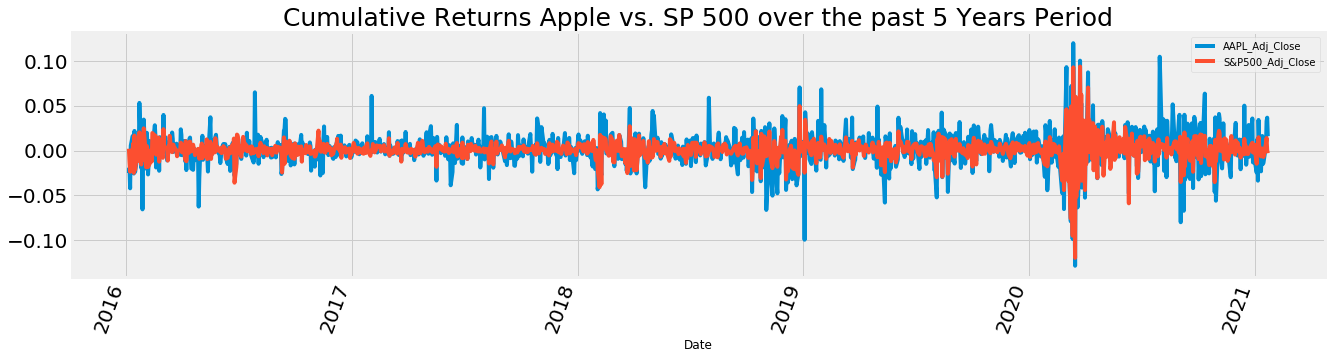

In [160]:
AAPL_SP500 = Combined_Returns.plot.line(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Cumulative Returns Apple vs. SP 500 over the past 5 Years Period", fontsize=25);
AAPL_SP500;

### Cumulative Returns

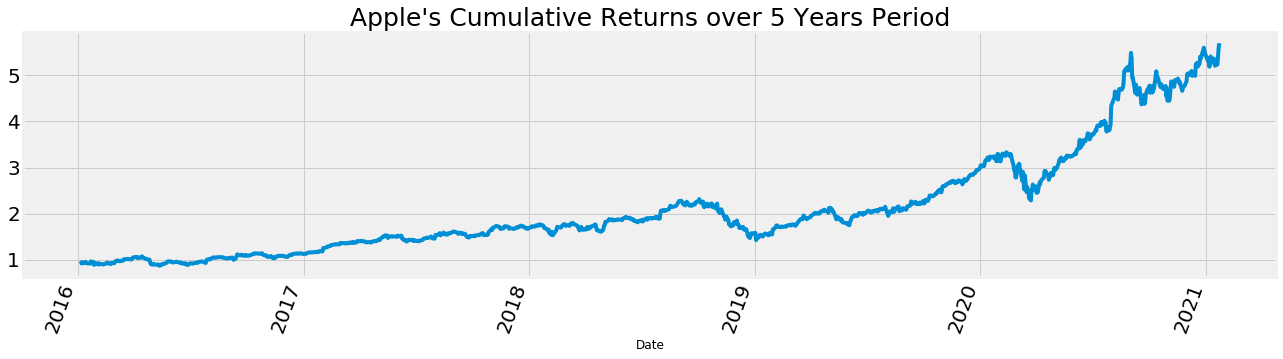

In [161]:
# Plot cumulative returns
Cumulative_Returns = (1 + AAPL_close_df_pct).cumprod()
Cumulative_Returns.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Cumulative Returns over 5 Years Period", fontsize=25);

## Exponentially Weighted Moving Average

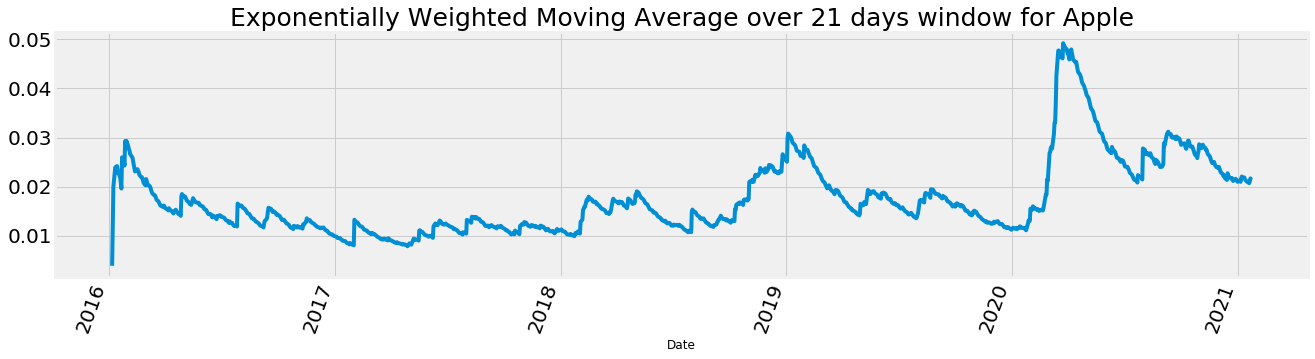

In [162]:
# Calculate a rolling window using the exponentially weighted moving average. 
AAPL_MA = AAPL_close_df_pct.ewm(halflife = 21).std().plot(
    kind='line', 
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Exponentially Weighted Moving Average over 21 days window for Apple", fontsize=25);
AAPL_MA;

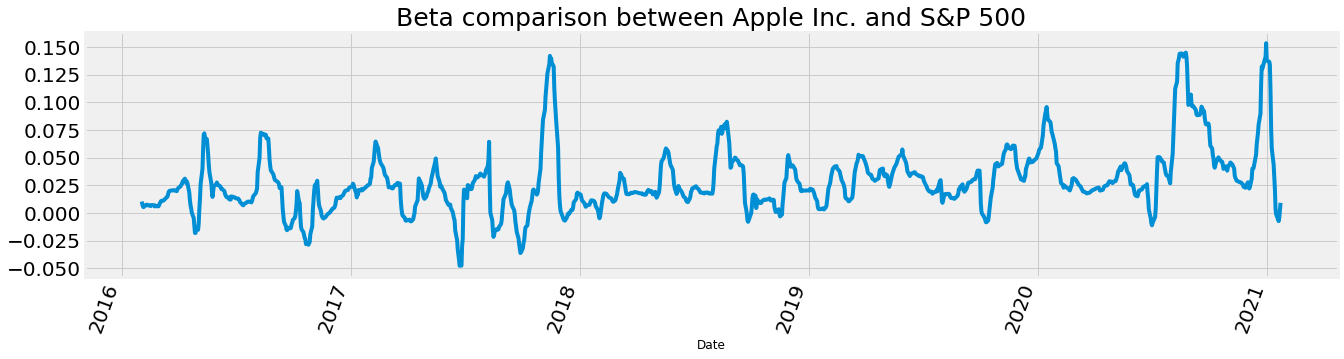

In [163]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
Covariance_Apple = Data["AAPL_Adj_Close"].rolling(window = 21).cov(Data_1["S&P500_Adj_Close"])
Variance_Apple = Data_1["S&P500_Adj_Close"].rolling(window = 21).var()
Beta_Apple = Covariance_Apple / Variance_Apple
AAPL_beta = Beta_Apple.plot(
    kind='line', 
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Beta comparison between Apple Inc. and S&P 500", fontsize=25);
AAPL_beta;

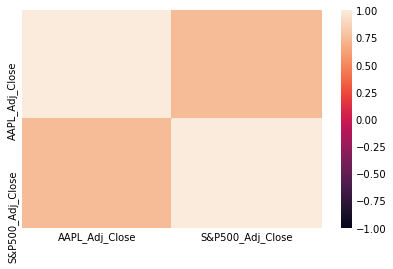

In [164]:
# Construct a correlation table
Correlation = Combined_Returns.corr()
Correlation
sns.heatmap(Correlation, vmin=-1, vmax=1)

## Forecasting Using ARMA & ARIMA Model

In [165]:
# Making sure to drop NANS before Modeling
AAPL_close_df_pct = AAPL_close_df_pct.dropna()
AAPL_close_df_pct.head()

Date
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042205
2016-01-08    0.005288
2016-01-11    0.016192
Name: AAPL_Adj_Close, dtype: float64

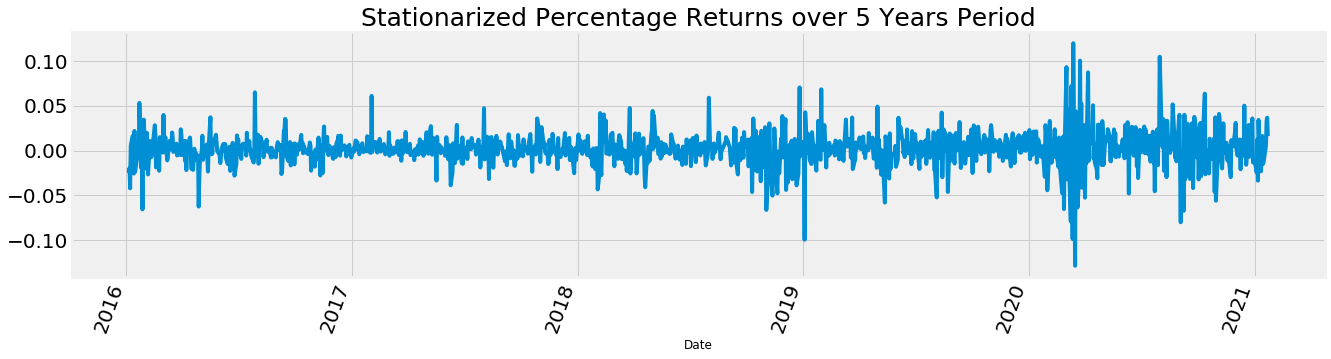

In [166]:
# Data must be Stationarized and here is the plot
from matplotlib import pyplot as plt    
AAPL_close_df_pct.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Stationarized Percentage Returns over 5 Years Period", fontsize=25);

## ARMA Model for Apple Inc

In [167]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(AAPL_close_df_pct.values, order=(1,1))
# Fit the model to the data
results = model.fit()

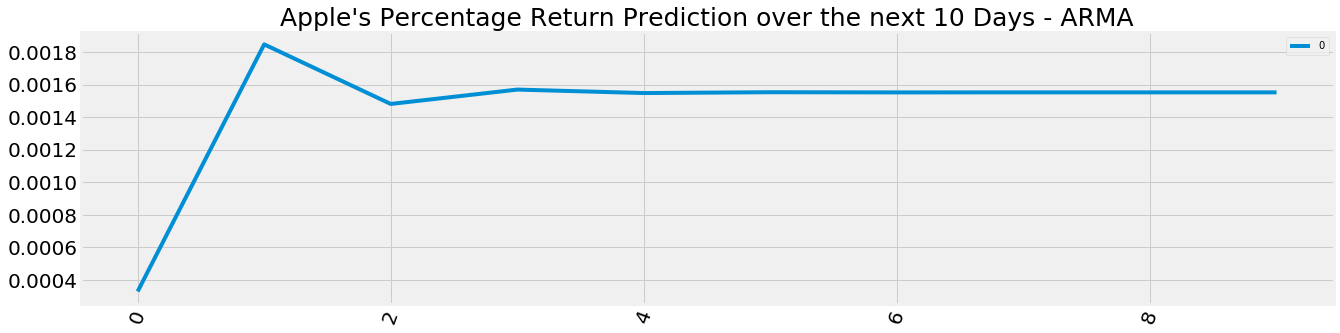

In [168]:
# Plot the forecasted return for the next 10 days
AAP_return_forecast = pd.DataFrame(results.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Percentage Return Prediction over the next 10 Days - ARMA", fontsize=25);
AAP_return_forecast;

In [169]:
# Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1272
Model:                     ARMA(1, 1)   Log Likelihood                3242.621
Method:                       css-mle   S.D. of innovations              0.019
Date:                Wed, 27 Jan 2021   AIC                          -6477.242
Time:                        23:28:52   BIC                          -6456.649
Sample:                             0   HQIC                         -6469.507
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.000      3.227      0.001       0.001       0.002
ar.L1.y       -0.2411      0.234     -1.032      0.302      -0.699       0.217
ma.L1.y        0.1257      0.239      0.526      0.599      -0.343       0.594
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.1477           +0.0000j            4.1477            0.5000
MA.1           -7.9523           +0.0000j            7.9523            0.5000
-----------------------------------------------------------------------------
"""

## ARIMA Model for Apple Inc

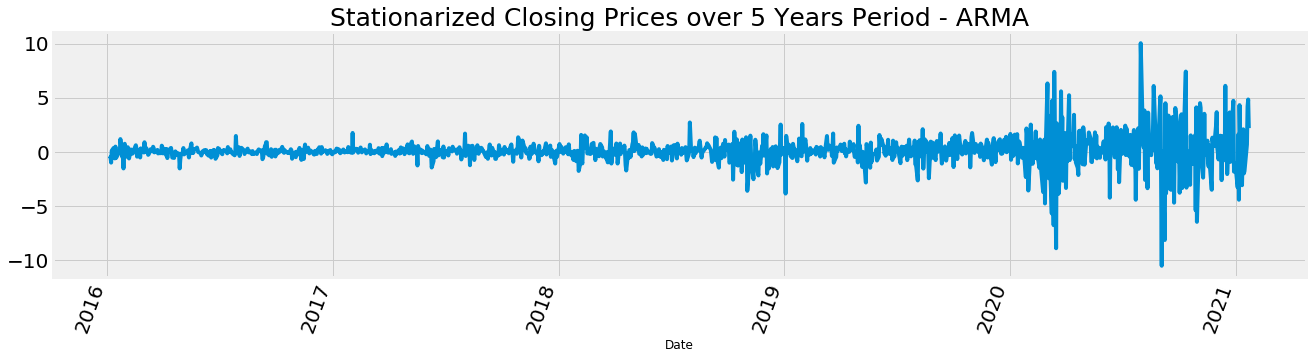

In [170]:
# Differencing the Close price stationarizes the time series
AAPL_close_df.diff().plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Stationarized Closing Prices over 5 Years Period - ARMA", fontsize=25);

## Autocorrelation and Partial Autocorrelation Analysis

In [171]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

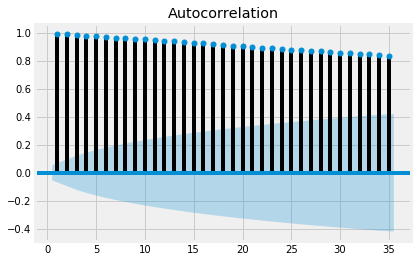

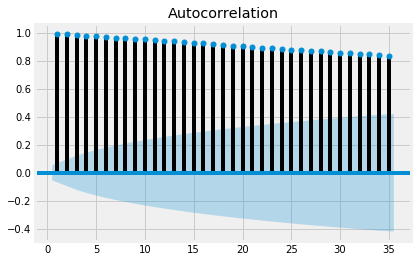

In [172]:
# Plot the autocorrelation of the Close Prices
plot_acf(AAPL_close_df, zero=False, lags=35)

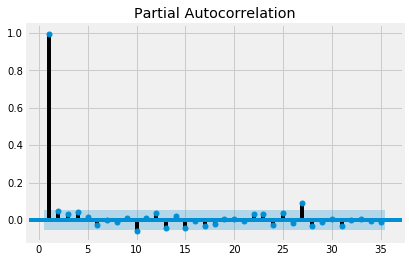

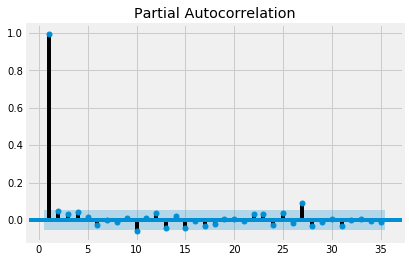

In [173]:
# Plot the partial autocorrelation of the returns
plot_pacf(AAPL_close_df, zero=False, lags=35)

In [174]:
from statsmodels.tsa.arima_model import ARIMA

In [175]:
# Create an ARIMA model
model = ARIMA(AAPL_close_df.values, order=(1, 1, 1))
# Fit the model to the data
results_ARIMA = model.fit()
# Print the model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1272
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2147.305
Method:                       css-mle   S.D. of innovations              1.309
Date:                Wed, 27 Jan 2021   AIC                           4302.611
Time:                        23:29:09   BIC                           4323.204
Sample:                             1   HQIC                          4310.346
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0901      0.033      2.713      0.007       0.025       0.155
ar.L1.D.y     -0.3225      0.167     -1.936      0.053      -0.649       0.004
ma.L1.D.y      0.1969      0.172      1.145      0.252      -0.140       0.534
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1003           +0.0000j            3.1003            0.5000
MA.1           -5.0797           +0.0000j            5.0797            0.5000
-----------------------------------------------------------------------------
"""

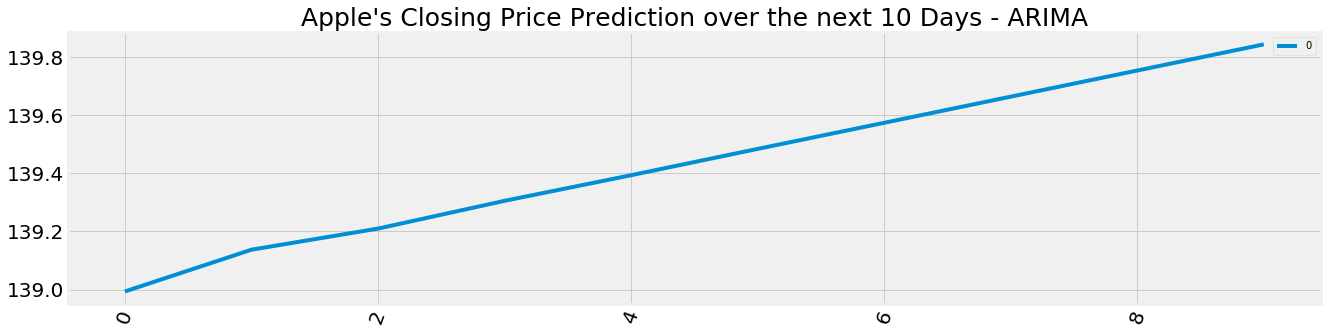

In [176]:
# Plot the Futures Price Forecast
AAPL_ARIMA = pd.DataFrame(results_ARIMA.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Closing Price Prediction over the next 10 Days - ARIMA", fontsize=25);
AAPL_ARIMA;

## ARIMA Model for BitCoin

In [177]:
# Create an ARIMA model for BitCoin
model_BTC = ARIMA(BTC_df["BTC_Close"].values, order=(1, 1, 1))
# Fit the model to the data
results_ARIMA_BTC = model_BTC.fit()
# Print the model summary
results_ARIMA_BTC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  719
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5527.606
Method:                       css-mle   S.D. of innovations            527.933
Date:                Wed, 27 Jan 2021   AIC                          11063.213
Time:                        23:29:13   BIC                          11081.524
Sample:                             1   HQIC                         11070.283
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.5785     20.478      1.884      0.060      -1.558      78.715
ar.L1.D.y     -0.0716      0.376     -0.191      0.849      -0.808       0.665
ma.L1.D.y      0.1147      0.373      0.307      0.758      -0.616       0.846
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9612           +0.0000j           13.9612            0.5000
MA.1           -8.7212           +0.0000j            8.7212            0.5000
-----------------------------------------------------------------------------
"""

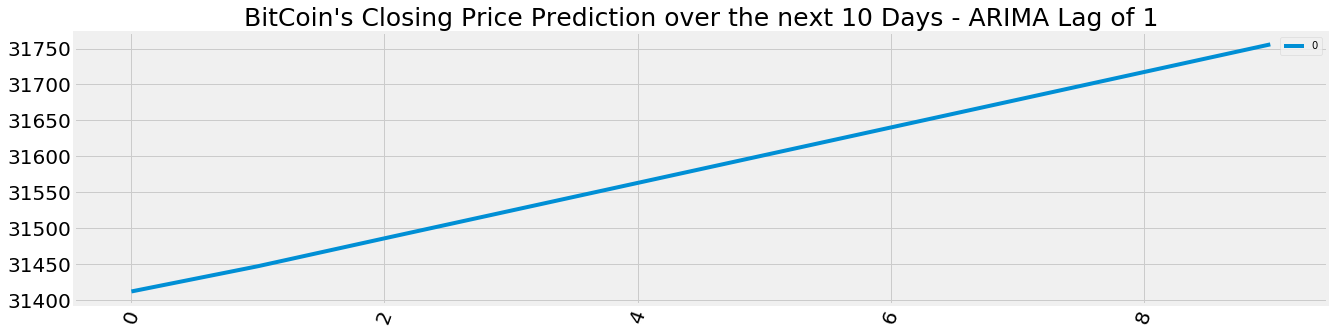

In [178]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA_BTC.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Price Prediction over the next 10 Days - ARIMA Lag of 1", fontsize=25);

## ARIMA Model using a Lag of 2 for BitCoin

In [179]:
# Create an ARIMA Model and fit it to the data
model_2 = ARIMA(BTC_df["BTC_Close"].values, order=(2, 1, 1))
results_ARIMA_2 = model_2.fit()
# print the model summary
results_ARIMA_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  719
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5527.204
Method:                       css-mle   S.D. of innovations            527.636
Date:                Wed, 27 Jan 2021   AIC                          11064.408
Time:                        23:29:18   BIC                          11087.297
Sample:                             1   HQIC                         11073.245
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6602     19.603      1.972      0.049       0.239      77.082
ar.L1.D.y      0.3233      0.331      0.976      0.329      -0.326       0.972
ar.L2.D.y     -0.0458      0.039     -1.174      0.240      -0.122       0.031
ma.L1.D.y     -0.2803      0.330     -0.850      0.395      -0.926       0.366
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.5275           -3.0627j            4.6715           -0.1138
AR.2            3.5275           +3.0627j            4.6715            0.1138
MA.1            3.5681           +0.0000j            3.5681            0.0000
-----------------------------------------------------------------------------
"""

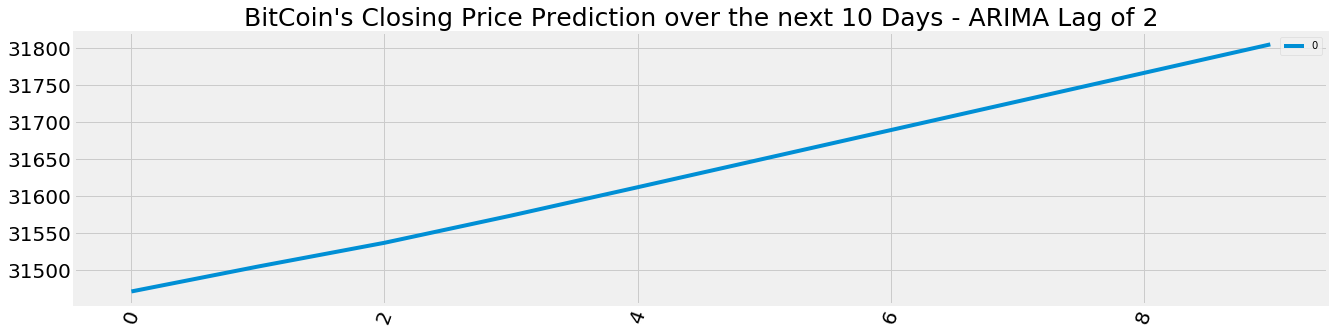

In [180]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA_2.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Price Prediction over the next 10 Days - ARIMA Lag of 2", fontsize=25);

## Linear Regression with Train/Test split

In [181]:
import arch as arch
import warnings
warnings.filterwarnings('ignore')

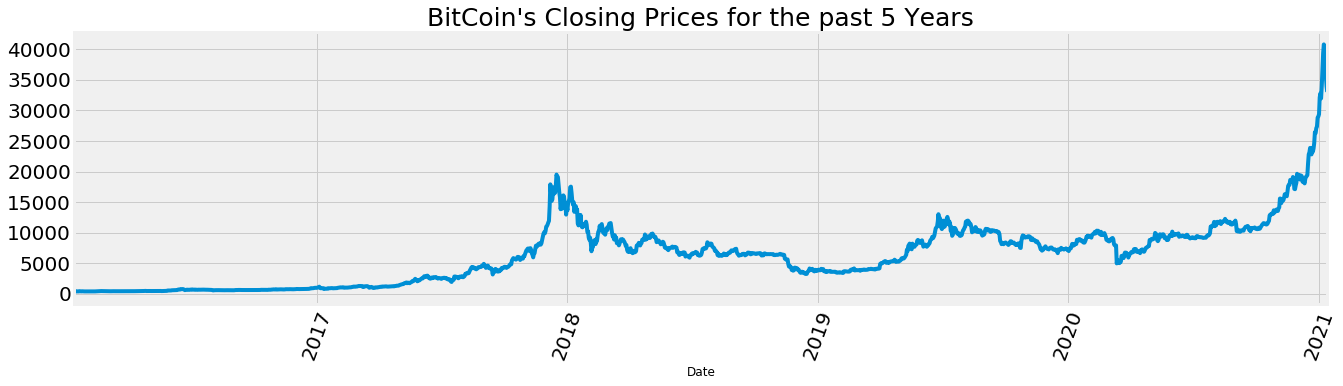

In [182]:
BTC_path = Path('../Resources/BTC.csv')
BTC_csv = pd.read_csv(BTC_path, parse_dates=True, index_col='Date')
BTC_csv.Close.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Prices for the past 5 Years", fontsize=25);

In [183]:
# Create a series using "Close" price percentage returns, drop any NaNs, and check the results:
# (Make sure to multiply the pct_change() results by *100)
BTC_csv['Return'] = BTC_csv.Close.pct_change() * 100
BTC_csv['Lagged_Return'] = BTC_csv['Return'].shift()
BTC_csv = BTC_csv.dropna()
BTC_csv.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2021-01-09,40788.640625,41436.351563,38980.875000,40254.546875,40254.546875,61984162837,-1.331114,3.623390
2021-01-10,40254.218750,41420.191406,35984.628906,38356.441406,38356.441406,79980747690,-4.715257,-1.331114
2021-01-11,38346.531250,38346.531250,30549.599609,35566.656250,35566.656250,123320567398,-7.273316,-4.715257
2021-01-12,35516.359375,36568.527344,32697.976563,33922.960938,33922.960938,74773277909,-4.621450,-7.273316
2021-01-13,33963.351563,34061.976563,32643.052734,33017.734375,33017.734375,75174313984,-2.668477,-4.621450


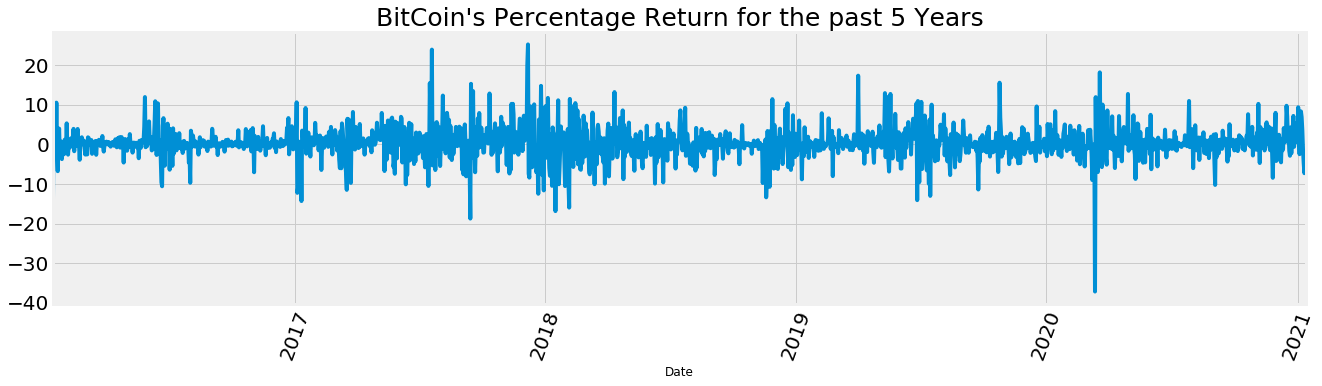

In [184]:
BTC_csv['Return'].plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Percentage Return for the past 5 Years", fontsize=25);

In [185]:
# Create a train/test split for the data using 2017-2018 for training and 2019 for testing
train = BTC_csv['2017':'2019']
test = BTC_csv['2020']
# Create four DataFrames:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

## Make predictions using the Testing Data

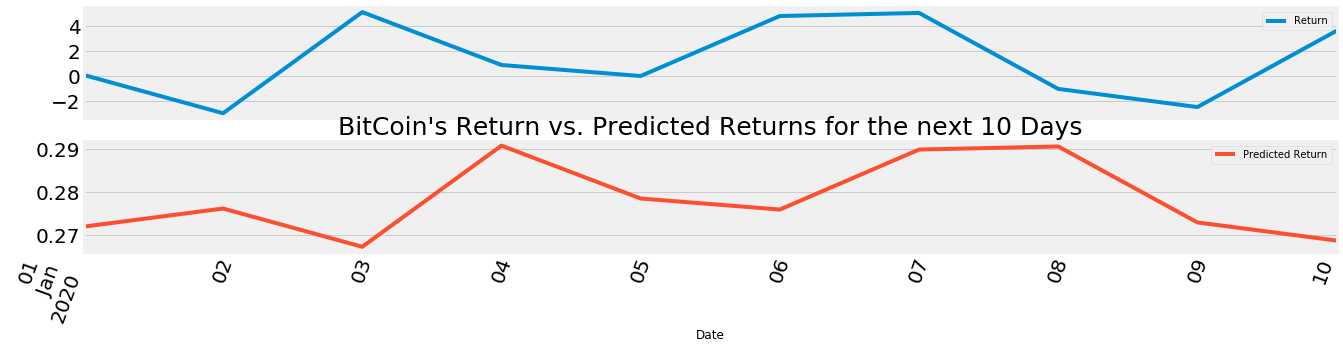

In [186]:
# Make a prediction of "y" values using just the test dataset
BTC_predictions = model_LR.predict(X_test)
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a DataFrame:
Predictions_Results = y_test.to_frame()
Predictions_Results["Predicted Return"] = BTC_predictions

# Plot the first 20 predictions vs the true values
Predictions_Results[:10].plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    subplots=True,
    grid=True);
plt.title(label="BitCoin's Return vs. Predicted Returns for the next 10 Days", fontsize=25);

## Out-of-Sample Performance


In [187]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the DataFrame above)
mse = mean_squared_error(
    Predictions_Results["Return"],
    Predictions_Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 3.771512992249688


## In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [188]:
# Construct a DataFrame using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model_LR.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 4.324559463850791


## ARMA Model for BitCoin Prediction

In [189]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model_5 = ARMA(BTC_csv['Return'].values, order=(1,1))
# Fit the model to the data
results_5 = model_5.fit()

# Look at Summary
results_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     ARMA(1, 1)   Log Likelihood               -5091.650
Method:                       css-mle   S.D. of innovations              3.933
Date:                Wed, 27 Jan 2021   AIC                          10191.300
Time:                        23:29:36   BIC                          10213.340
Sample:                             0   HQIC                         10199.430
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3164      0.091      3.471      0.001       0.138       0.495
ar.L1.y       -0.8863      0.085    -10.466      0.000      -1.052      -0.720
ma.L1.y        0.8681      0.090      9.620      0.000       0.691       1.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1283           +0.0000j            1.1283            0.5000
MA.1           -1.1519           +0.0000j            1.1519            0.5000
-----------------------------------------------------------------------------
"""

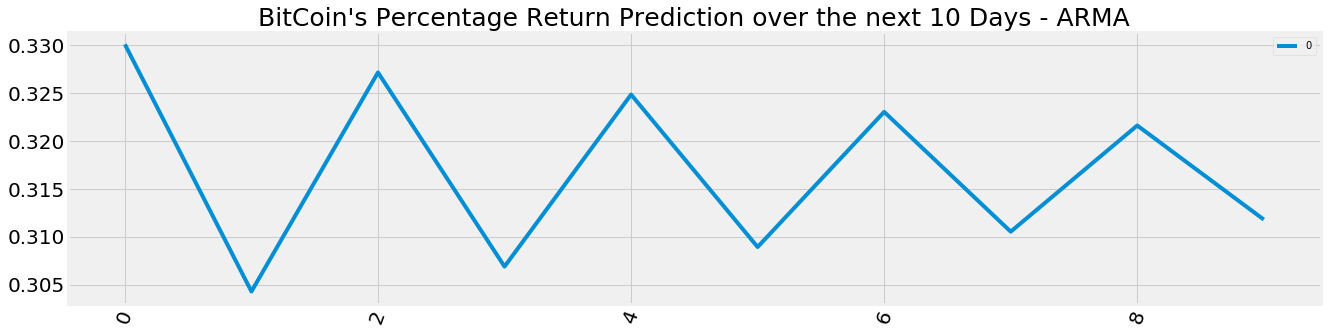

In [190]:
# Plot the forecasted return for the next 20 days
pd.DataFrame(results_5.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Percentage Return Prediction over the next 10 Days - ARMA", fontsize=25);

## Dashboard

In [191]:
# Create panels to structure the layout of the dashboard
price_column = pn.Column("Price Analysis", AAPL_MA, AAPL_beta, AAPL_SP500)
prediction_column = pn.Column(
    "## Model Predictions", AAP_return_forecast, AAPL_ARIMA)

In [192]:
pop_dashboard = pn.Tabs(
    (
        "Price Analysis",
        price_column
    ),
    (
        "Price Predictions",
        prediction_column
    )
)

pop_dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
        [3] Str(AxesSubplot)
    [1] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)